In [1]:
import os
import numpy as np
import codecs
path_baptiste = "/home/baptiste/Documents/data/train"
path_igor = "C:/Users/Igor/Documents/Master Data Science/Big Data Analytics/Projet/Data/train"
path_sofia = "/Users/Flukmacdesof/data 2/train"



#assumes labelled data ra stored into a positive and negative folder
#returns two lists one with the text per file and another with the corresponding class 
def loadLabeled(path):

	rootdirPOS =path+'/pos'
	rootdirNEG =path+'/neg'
	data=[]
	Class=[]
	count=0
	for subdir, dirs, files in os.walk(rootdirPOS):
		
		for file in files:
			with codecs.open(rootdirPOS+"/"+file, 'r',encoding="utf-8") as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc1=np.ones(len(data))
	for subdir, dirs, files in os.walk(rootdirNEG):
		
		for file in files:
			with codecs.open(rootdirNEG+"/"+file, 'r',encoding="utf-8") as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc0=np.zeros(len(data)-len(tmpc1))
	Class=np.concatenate((tmpc1,tmpc0),axis=0)
	return data,Class
#loads unlabelled data	
#returns two lists
#one with the data per file and another with the respective filenames (without the file extension)
def loadUknown(path):
	rootdir=path
	data=[]
	names=[]
	for subdir, dirs, files in os.walk(rootdir):
		for file in files:
			with open(rootdir+"/"+file, 'r') as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
				names.append(file.split(".")[0])
	return data,names

## Data loading

In [3]:
data, Class = loadLabeled(path_sofia)

In [14]:
reviews = data

## First data cleaning (Igor):
- Remove all the HTML symbols

In [15]:
# Remove HLML signs
HTMLlist = ['<br />']

for idx, review in enumerate(reviews):
    for word in HTMLlist:
        reviews[idx] = review.replace(word,' ')

In [18]:
reviews[0]

u'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

## Creating new features : Other ideas to try

- Find N-grams where it may start with a CAPITAL (As for the movie names and actor's names)


## Feature creation (Sofia):
- List punctuation (various form)
- Find smiley

In [19]:
excla = [0]*len(reviews)
inter = [0]*len(reviews)
susp = [0]*len(reviews)
for i, review in enumerate(reviews):
    for char in review:
        if char == "?":
            inter[i] += 1
        elif char == "!":
            excla[i] += 1

In [20]:
from nltk.tokenize.casual import TweetTokenizer
ttoken = TweetTokenizer(reduce_len=True)
tokenized_reviews = []

for review in reviews:
    tokenized_reviews.append(ttoken.tokenize(review))

In [21]:
for i, review in enumerate(tokenized_reviews):
    for word in review:
        if word == "...":
            susp[i] += 1

<a list of 50 Patch objects>

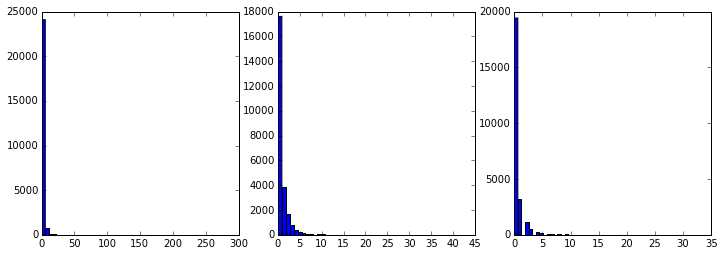

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].hist(excla, bins=50)[2]
ax[1].hist(inter, bins=50)[2]
ax[2].hist(susp, bins=50)[2]

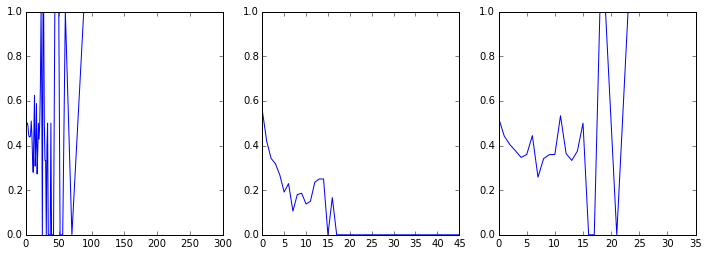

In [24]:
u_excla = pd.unique(excla)
u_inter = pd.unique(inter)
u_susp = pd.unique(susp)


plot_excla = {}
plot_inter = {}
plot_susp = {}
dicts = [
    [np.array(plot_excla), sorted(u_excla), excla],
    [np.array(plot_inter), sorted(u_inter), inter], 
    [np.array(plot_susp), sorted(u_susp), susp]
]
for dic in dicts: 
    dic[0]={key: np.mean(Class[np.where(dic[2]==key)]) for key in dic[1]}
    
    
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i in range(3) :
    ax[i].plot(*zip(*sorted(dicts[i][0].items())))
    ax[i].set_ylim([0,1])

## Feature creation (Igor): 
- Length of the review
- Grad given in the review
- Movie mentionned in the review

In [25]:
# The movie list has to be completed
# - Find a list of the movie so as it matches some in the reviews : www.imdb.com
movie_list = ['Titanic']

rev_length = []
rev_grade = []
rev_movie = []

for review in reviews:
    # Length of the review
    rev_length.append(len(review))
    
    # Grade/Mark in the review
    for idx, char in enumerate(review):
        if char == '/' and idx < len(review)-2:
            if review[idx+1] == '1' and review[idx+2] == '0':
                rev_grade.append(review[idx-1])
        else:
            rev_grade.append(-1)
    # Movie in the review
    for movie_name in movie_list:
        if movie_name in review:
            rev_movie.append(movie_name)
            #break
        else:
            rev_movie.append('no movie')

## Second Data Cleaning (After the features creation) :
 - Punctuation
 - Stop Words


In [26]:
#import sys
#reload(sys)  
#sys.setdefaultencoding('Cp1252')


In [28]:
#print sys.getdefaultencoding()

In [30]:
# Remove punctuation, lower all characters
# exclude = {',' ,'+', '<', ':', '/', ']', '(', ')', '{', '"', '_', '?', '@', '}', ...}
import string
exclude = set(string.punctuation)
for idx, review in enumerate(reviews):
    reviews[idx] = ''.join([w for w in review.lower() if w not in exclude])
    
    
# Remove stop words based on the given list - To be changed depending on the needs
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
for idx, review in enumerate(reviews):
    reviews[idx] = ''.join([w for w in review if w not in stopwords])
    #problème de codage à voir

## Third Data Cleaning (Baptiste): 
- Stemmisation

In [31]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [32]:

# Steeming -> Reduce words to their initial mining

for idx, review in enumerate(reviews):
    for word in review: 
        reviews[idx] = ''.join([stemmer.stem(word)+' ' for word in review.split()])

KeyboardInterrupt: 

## Tf - Idf Matrix (Igor)

#### To be upgraded with new tf and idf functions!

In [ ]:
# Features extraction with TF - IDF : get the matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

m = TfidfVectorizer()
tfidf_matrix = m.fit_transform(reviews)

print("Size of the tfidf matrix: ", tfidf_matrix.size)

##  CSV Creation (Baptiste):

Create 5 csv : train_train.csv, train_test.csv, y_train_train.csv, y_train_test.csv, test.csv

In [ ]:
# Split the tf-idf matrix into two data sets to process the cross validation : training and test set
from sklearn.cross_validation import train_test_split

data_train, data_test, label_train, label_test = train_test_split(tfidf_matrix, Class, test_size = 0.3, random_state = 42)

In [ ]:
import scipy
import csv

def save_sparse_csr(filename, array):
    np.savez(filename, data = array.data, indices = array.indices, 
             indptr = array.indptr, shape = array.shape)
    
def load_sparse_csr(filename):
    loader = np.load(filename)
    return scipy.sparse.csr_matrix(( loader['data'], loader['indices'], loader['indptr']),
                     shape = loader['shape'])

def save_csv(filename, array):
    with open(filename, 'wb') as csvfile:
        writer = csv.writer(csvfile, delimiter = '\n')
        writer.writerow(array)
        
def load_csv(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter = '\n')
        array = [float(row[0]) for row in reader]
        return array

In [ ]:
save_sparse_csr('data_train', data_train)
save_sparse_csr('data_test', data_test)
save_csv('label_train.csv', label_train)
save_csv('label_test.csv', label_test)